In [2]:
import librosa
# 畫音訊陣列
import matplotlib.pyplot as plt
# 不要產生譜圖
# matplotlib.use('Agg')
import librosa.display
import pylab as pl
import sklearn
import numpy as np
import os

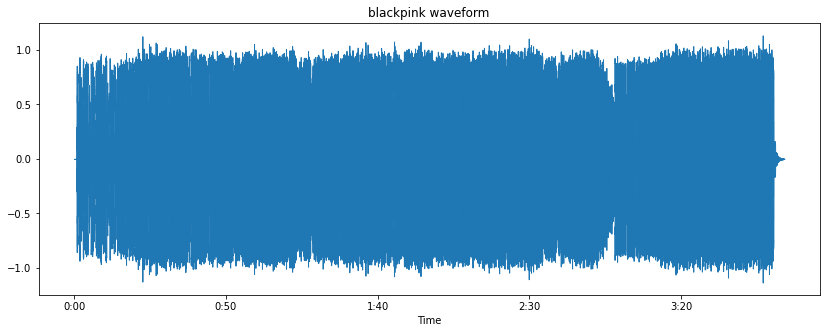

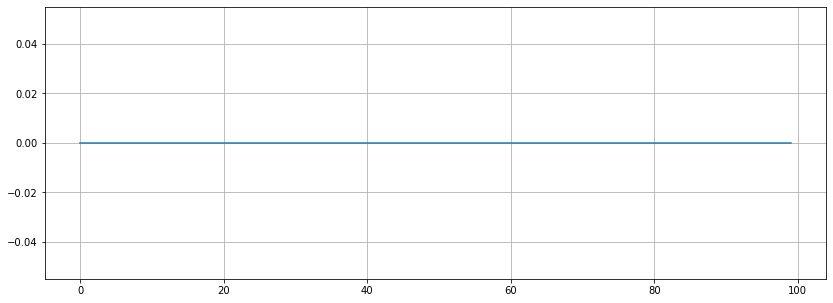

In [11]:
'''過零率'''

# 讀取音檔.
x, sr = librosa.load('/Users/student/Librosa_test/party/BLACKPINK - FOREVER YOUNG (Color Coded Lyrics EngRomHan가사 ).wav')

# 畫頻譜圖
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)  # x:時間, sr:取樣率
plt.title('blackpink waveform')
plt.show()

n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()



In [12]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

y, sr = librosa.load('/Users/student/Librosa_test/party/BLACKPINK - FOREVER YOUNG (Color Coded Lyrics EngRomHan가사 ).wav')
librosa.feature.zero_crossing_rate(y)

0


array([[0.        , 0.        , 0.        , ..., 0.16162109, 0.20654297,
        0.18115234]])

C:\Users\student\AppData\Local\Temp\ipykernel_2076\4132412948.py:3: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]


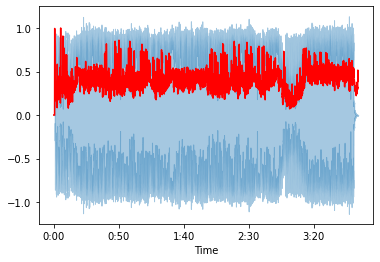

In [7]:
'''光譜質心'''
x, sr = librosa.load('/Users/student/Librosa_test/party/BLACKPINK - FOREVER YOUNG (Color Coded Lyrics EngRomHan가사 ).wav')
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation


def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)


# Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

C:\Users\student\AppData\Local\Temp\ipykernel_2076\2116179641.py:2: FutureWarning: Pass y=[0.01 0.01 0.01 ... 0.01 0.01 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]


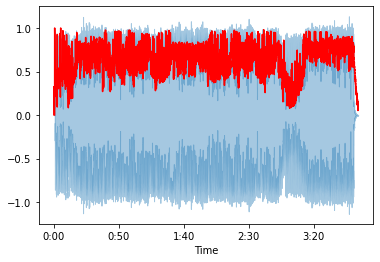

In [8]:
'''光譜衰減'''
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

C:\Users\student\AppData\Local\Temp\ipykernel_2076\1096594439.py:5: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)


(20, 10079)
[ 3.0278380e-09 -1.2111352e-08  6.0556760e-09  0.0000000e+00
  6.0556760e-09 -3.0278380e-09 -1.8167027e-08  6.0556760e-09
 -1.2111352e-08  1.5139190e-09  0.0000000e+00  6.0556760e-09
  9.0835135e-09  6.0556760e-09 -6.0556760e-09 -6.0556760e-09
 -1.2111352e-08  6.0556760e-09  3.0278380e-09 -7.5695950e-10]
[1.        1.0000002 1.        1.        1.        1.        1.
 1.        1.        1.0000002 1.        1.0000001 1.        1.0000001
 1.        0.9999999 1.        0.9999999 1.        0.9999999]


C:\Users\student\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\student\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


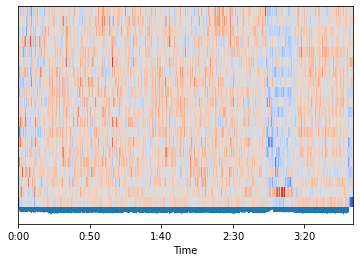

In [9]:
'''梅爾倒頻譜係數'''
x, fs = librosa.load('/Users/student/Librosa_test/party/BLACKPINK - FOREVER YOUNG (Color Coded Lyrics EngRomHan가사 ).wav')
librosa.display.waveshow(x, sr=sr)
# 計算超過 97 帪的 20 個 MFCC
mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)
(20, 97)
# Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

# 特徵縮放，使每個單位皆有零均值和單位方差
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

C:\Users\student\AppData\Local\Temp\ipykernel_2076\2095066751.py:5: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)


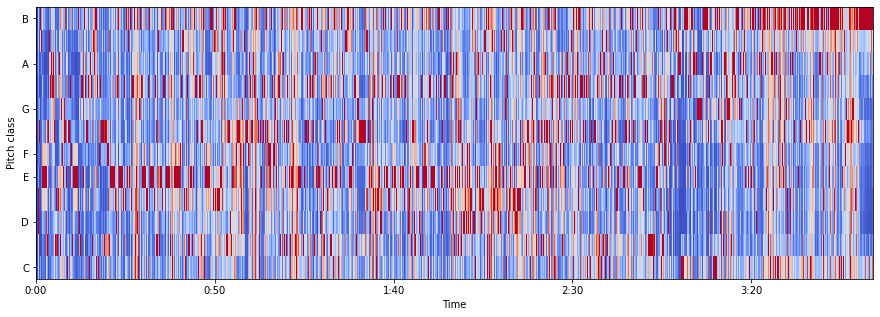

In [10]:
'''色度頻率'''
# Loadign the file
x, sr = librosa.load('/Users/student/Librosa_test/party/BLACKPINK - FOREVER YOUNG (Color Coded Lyrics EngRomHan가사 ).wav')
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time',
                         y_axis='chroma', hop_length=hop_length, cmap='coolwarm')